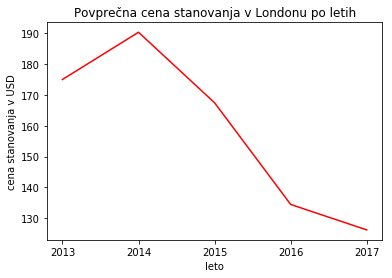

In [28]:
import numpy as np
import operator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from csv import DictReader
from os import listdir

# Koda za prvi graf
def average_price_for_given_year(filePath):
    reader = DictReader(open('files/' + filePath, 'rt', encoding='utf-8'))
    price = []

    for row in reader:
        try:
            price.append(float(row["price"]))
        except:
            pass
    
    return sum(price) / len(price)



def avg_years_plot():
    years = {}

    years["2013"] = average_price_for_given_year(listdir("files/")[0])
    years["2014"] = average_price_for_given_year(listdir("files/")[1])
    years["2015"] = (average_price_for_given_year(listdir("files/")[2]) +
                     average_price_for_given_year(listdir("files/")[3])) / 2
    years["2016"] = sum([average_price_for_given_year(listdir("files/")[i]) for i in range(4, 9)]) / 5
    years["2017"] = sum([average_price_for_given_year(listdir("files/")[i]) for i in range(9, 16)]) / 7

    plt.figure()
    plt.plot(['2013', '2014', '2015', '2016', '2017'], [years['2013'], years['2014'], years['2015'], years['2016'], years['2017']], 'r')
    plt.title('Povprečna cena stanovanja v Londonu po letih')
    plt.xlabel('leto')
    plt.ylabel('cena stanovanja v USD')
    plt.show()

avg_years_plot()

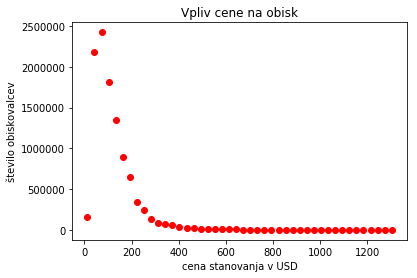

In [3]:
def visits_per_price():
    reviews = []
 
    for file in listdir("files/"):
        reader = DictReader(open('files/' + file, 'rt', encoding='utf-8'))
        
        for row in reader:
            try:
                if row["reviews"] == "" or row["reviews"] == "0":
                    raise Exception()
                datarow = [float(row["price"]), int(row["reviews"]) * 1.3]
                reviews.append(datarow)
            except:
                pass
            
    return reviews
 
 
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or np.math.fabs(value - array[idx - 1]) < np.math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]
 
def visits_per_price_plot():
    data = visits_per_price()
    dataset = np.arange(13.0, 1323.0, 30.0)
    pairs = {}

    for x, value in np.ndenumerate(dataset):
        pairs[value] = 0

    for row in data:
        key = find_nearest(dataset, row[0])
        pairs[key] = pairs[key] + row[1]

    plt.plot(pairs.keys(), pairs.values(), "ro")
    plt.title("Vpliv cene na obisk")
    plt.xlabel('cena stanovanja v USD')
    plt.ylabel('število obiskovalcev')
    plt.show()
    
visits_per_price_plot()

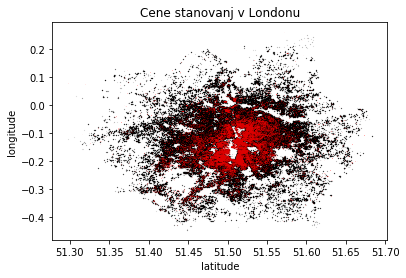

In [4]:
def get_coordinates_and_price():
    latitude = []
    longitude = []
    price = []
 
    for file in listdir("files/"):
        reader = DictReader(open('files/' + file, 'rt', encoding='utf-8'))
        
        for row in reader:
            try:
                lat =  float(row["latitude"])
                long = float(row["longitude"])
                pri = float(row["price"])
                
                latitude.append(lat)
                longitude.append(long)
                price.append(pri)
            except:
                pass
            
    return [latitude, longitude, price]

def heatmap():
    latitude, longitude, price = get_coordinates()
    
    img = plt.imread("london.jpg")
    fig, ax = plt.subplots()
    
    ax.imshow(img, extent=[0, 3500, 0, 3000])
    ax.plot(list(np.array(latitude) + 1500), list(np.array(longitude) + 1500), "ko", markersize=0.01)

    #plt.plot(latitude, longitude, "ko", markersize=0.05)
    #plt.plot(latitude, longitude, "ro", markersize=0.01)
    #plt.title("Porazdeljenost stanovanj po Londonu")
    #plt.xlabel('koordinate x')
    #plt.ylabel('koordinate y')
    
# heatmap()
def example_of_heatmap_without_a_map():
    # Create data
    latitude, longitude, price = get_coordinates()
    
    # Create heatmap
    heatmap, xedges, yedges = np.histogram2d(latitude, longitude, bins=(64,64))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
 
    # Plot heatmap
    plt.figure(figsize=(6, 7))
    plt.clf()
    plt.title('Heatmap')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.imshow(heatmap, extent=extent)
    plt.show()
# example_of_heatmap_without_a_map()

def price_location():
    latitude_bellow_average = []
    longitude_bellow_average = [] 
    price_bellow_average = []
    
    latitude_above_average = []
    longitude_above_average = [] 
    price_above_average = []
    
    latitude, longitude, price = get_coordinates_and_price()
    average_price = np.mean(price)
    
    for i in range(len(price)):
        if price[i] < average_price:
            latitude_bellow_average.append(latitude[i])
            longitude_bellow_average.append(longitude[i])
            price_bellow_average.append(price[i])
        else:
            latitude_above_average.append(latitude[i])
            longitude_above_average.append(longitude[i])
            price_above_average.append(price[i])
        
    plt.figure()
    plt.plot(latitude_bellow_average, longitude_bellow_average, "ko", markersize=0.05)
    plt.plot(latitude_above_average, longitude_above_average, "ro", markersize=0.01)
    plt.title("Cene stanovanj v Londonu")
    plt.xlabel("latitude")
    plt.ylabel("longitude")
    
price_location()

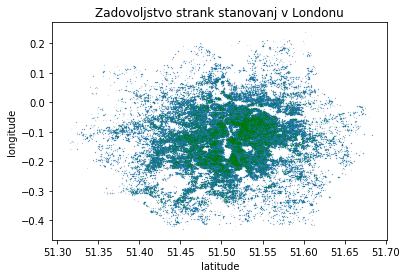

In [5]:
def get_coordinates_and_satisfaction():
    latitude = []
    longitude = []
    satisfaction = []
 
    for file in listdir("files/"):
        reader = DictReader(open('files/' + file, 'rt', encoding='utf-8'))
        
        for row in reader:
            try:
                lat =  float(row["latitude"])
                long = float(row["longitude"])
                sat = float(row["overall_satisfaction"])
                
                latitude.append(lat)
                longitude.append(long)
                satisfaction.append(sat)
            except:
                pass
            
    return [latitude, longitude, satisfaction]

def satisfaction_location():
    latitude_bellow_average = []
    longitude_bellow_average = [] 
    satisfaction_bellow_average = []
    
    latitude_above_average = []
    longitude_above_average = [] 
    satisfaction_above_average = []
    
    latitude, longitude, satisfaction = get_coordinates_and_satisfaction()
    average_satisfaction = np.mean(satisfaction)
    
    for i in range(len(satisfaction)):
        if satisfaction[i] < 4.8:
            latitude_bellow_average.append(latitude[i])
            longitude_bellow_average.append(longitude[i])
            satisfaction_bellow_average.append(satisfaction[i])
        else:
            latitude_above_average.append(latitude[i])
            longitude_above_average.append(longitude[i])
            satisfaction_above_average.append(satisfaction[i])
        
    plt.figure()
    plt.plot(latitude_bellow_average, longitude_bellow_average, "o", markersize=0.05)
    plt.plot(latitude_above_average, longitude_above_average, "go", markersize=0.01)
    plt.title("Zadovoljstvo strank stanovanj v Londonu")
    plt.xlabel("latitude")
    plt.ylabel("longitude")
    
satisfaction_location()

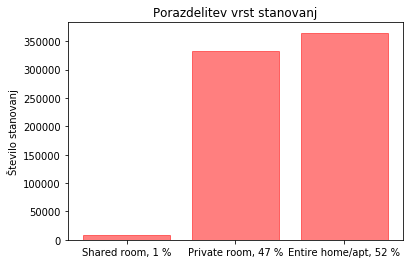

In [27]:
def room_type():
    room_type = {"Shared room": 0, "Private room": 0, "Entire home/apt": 0}
 
    for file in listdir("files/"):
        reader = DictReader(open('files/' + file, 'rt', encoding='utf-8'))
        
        for row in reader:
            try:
                room_type[row["room_type"]] += 1
            except:
                pass
            
    return room_type

def room_type_graph():
    room = room_type()
    all = sum(list(room.values()))
    private_room = int(np.round(room["Private room"] / all * 100))
    shared_room = int(np.round(room["Shared room"] / all * 100))
    entire_room = int(np.round(room["Entire home/apt"] / all * 100))
    
    objects = ["Shared room, {} %".format(shared_room), "Private room, {} %".format(private_room), "Entire home/apt, {} %".format(entire_room)]
    y_pos = np.arange(len(objects))
    performance = list(room.values())

    barlist = plt.bar(y_pos, performance, align='center', alpha=0.5)
    for bar in barlist:
        bar.set_color("r")
    plt.xticks(y_pos, objects)
    plt.ylabel('Število stanovanj')
    plt.title('Porazdelitev vrst stanovanj')

    plt.show()
room_type_graph()